In [69]:
using FFTW, Images, Plots
include("./LatticeFields.jl")
include("./LatticeIFTA.jl")
include("./slmIOHelpers.jl")

sft(v) = fftshift(fft(ifftshift(v)))
isft(v) = fftshift(ifft(ifftshift(v)))
sft(v::LF{ComplexAmplitude}) = LF{ComplexAmplitude}(fftshift(fft(ifftshift(v.data))),dualShiftLattice(v.L,v.flambda),v.flambda)
isft(v::LF{ComplexAmplitude}) = LF{ComplexAmplitude}(fftshift(ifft(ifftshift(v.data))),dualShiftLattice(v.L,v.flambda),v.flambda)

isft (generic function with 2 methods)

In [5]:
n = 128
L0 = natlat((n,n))
f = LF{Generic}(rand(length.(L0)...),L0);

In [6]:
L1 = natlat((n,))
μ = LF{Intensity}(exp.(-L1[1].^2 ./ 2),L1)
ν = LF{Intensity}(exp.(-L1[1].^2),L1);

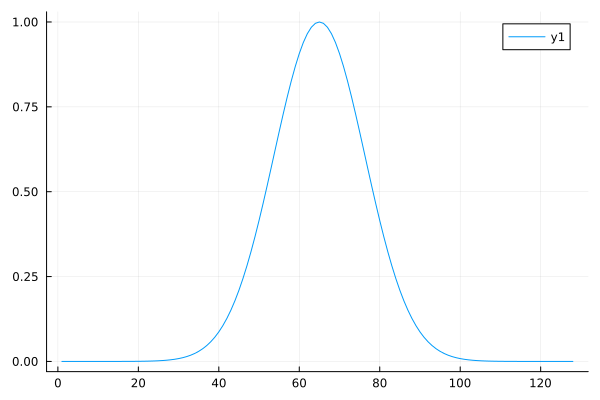

In [10]:
plot(μ.data)

In [14]:
αs = 0.1:0.1:1.0
ϕs = [LF{RealPhase}(α * L1[1].^2 / 2, L1) for α in αs] |> Tuple;

In [19]:
divImgs = [sft(sqrt(μ) * ϕ) |> square for ϕ in ϕs] |> Tuple;

In [22]:
look(divImgs[10])

In [35]:
g = pdgs(divImgs,ϕs,100,sqrt(ν) * ϕs[1]);

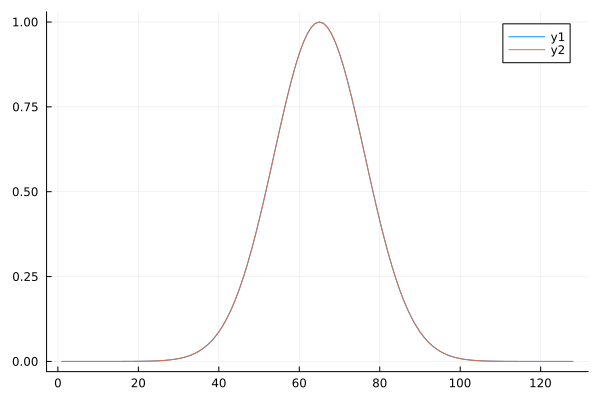

In [38]:
[μ.data, abs.(square(g).data)] |> plot

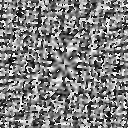

In [74]:
μ = LF{Intensity}([exp.(-(x^2+y^2) ./ 2) for x in L0[1], y in L0[2]],L0)
ν = LF{Intensity}([exp.(-(x^2+y^2) ./ 4) for x in L0[1], y in L0[2]],L0)
p = gs(μ,ν,1000,LF{ComplexPhase}(zeros(size(μ)) * im,μ.L));
look(p)

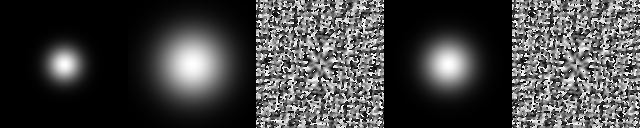

In [41]:
hcat([look(μ), look(sqrt(ν)),look(p), look(sqrt(μ) * p)]...)

In [71]:
αs = 0.1:0.1:1.0
beam = sqrt(μ) * LF{RealPhase}([(-0.5) * (x^2+y^2) /2 for x in L0[1], y in L0[2]], L0)
ϕs = [LF{RealPhase}([α * (x^2+y^2) /2 for x in L0[1], y in L0[2]], L0) for α in αs] |> Tuple;
divImgs = divImgs = [sft(beam * ϕ) |> square for ϕ in ϕs] |> Tuple;

In [72]:
g = pdgs(divImgs,ϕs,100,sqrt(ν) * ϕs[1]);

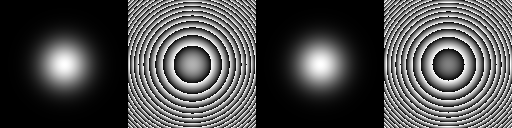

In [73]:
look(g,beam)

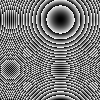

In [59]:
look(lfRampedParabola(RealPhase,(100,100),10,(50,51),1,(3,-1)))

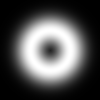

In [67]:
look(lfRing(Intensity,(100,100),2,1))

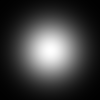

In [66]:
look(lfGaussian(Modulus,(100,100),2))